# 'Robo-Medivisor' Heart Disease Prediction

# Table of Contents:

## 1. Data Preparation
    1.1 Import Essential Libraries
    1.2 Data Visualisation
    1.3 Data Cleaning
    
## 2. Exploratory Data Analysis (EDA)
    2.1 Numeric Variables
    2.2 Categorical Variables
    
## 3. Machine Learning Models
    3.1 Decision Tree
    3.2 Random Forest
    3.3 Random Forest (With increased Estimators and Depth)
    3.4 Logistic Regression with Back Elimination
    
## 4. Proposed Solution

-------------------------------------------------------------------------------------------------------------------------------

## 1. Data Preparation

### 1.1 Import Essential Libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import re
sb.set()

### 1.2 Data Visualisation

In [2]:
# Import dataset (heart_con.csv)
heartdata = pd.read_csv('heart_con.csv')
heartdata.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


Description:
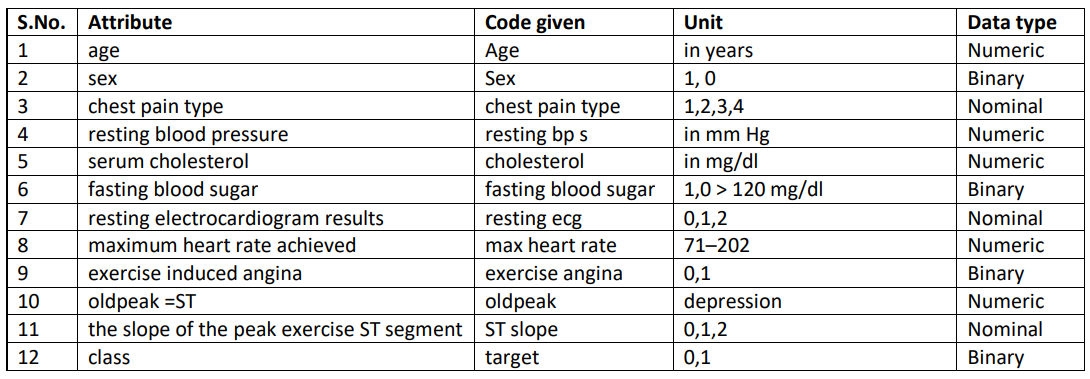

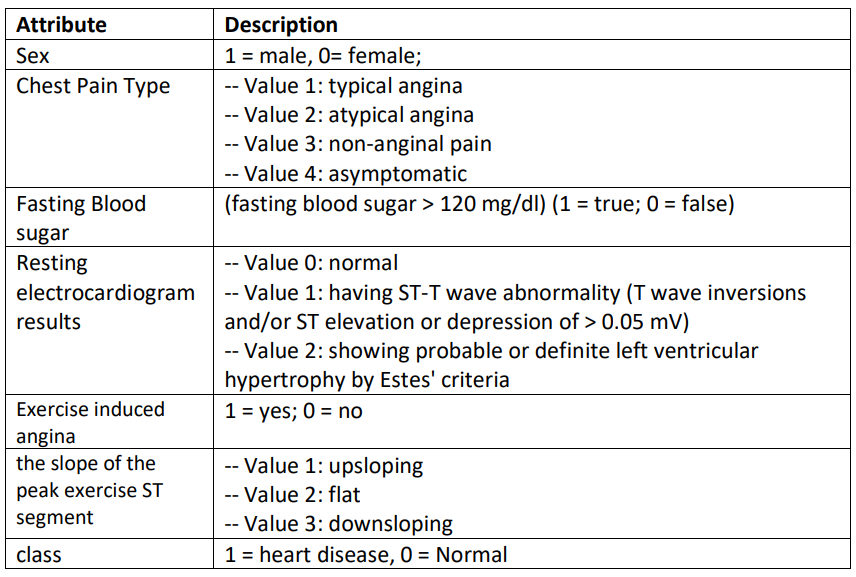

In [3]:
print("Data type : ", type(heartdata))
print("Data dims : ", heartdata.shape)
print("\n")
heartdata.info()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (1190, 12)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


Quick glance:
- 7 variables with 1190 data points
- No null data
- Response variable: target; predictors: remaining 11 variables

Ratio of classes is normal : heart disease =  561 : 629


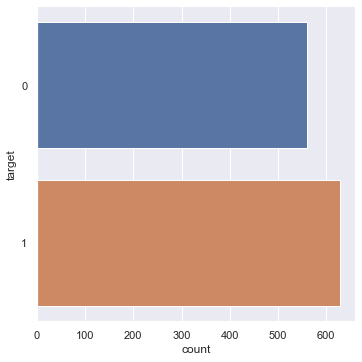

In [4]:
#Is the dataset balanced?
sb.catplot(y = 'target', data = heartdata, kind = "count")

count1, count0 = heartdata['target'].value_counts()
print("Ratio of classes is normal : heart disease = ", count0, ":", count1)

Legend: 1 = heart disease; 0 = normal

In [5]:
# Create new dataframe for clean dataset
cleandf = heartdata

# Extract categorical variables and convert to category type
categoricalcols = ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope', 'target']
cleandf[categoricalcols] = cleandf[categoricalcols].astype('category')

In [6]:
# Rename sex for better visualization during EDA
cleandf['sex'] = cleandf['sex'].cat.rename_categories({1: 'M', 0: 'F'})
cleandf

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,M,2,140,289,0,0,172,0,0.0,1,0
1,49,F,3,160,180,0,0,156,0,1.0,2,1
2,37,M,2,130,283,0,1,98,0,0.0,1,0
3,48,F,4,138,214,0,0,108,1,1.5,2,1
4,54,M,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,M,1,110,264,0,0,132,0,1.2,2,1
1186,68,M,4,144,193,1,0,141,0,3.4,2,1
1187,57,M,4,130,131,0,0,115,1,1.2,2,1
1188,57,F,2,130,236,0,2,174,0,0.0,2,1


In [7]:
# Extract numeric variables
numeric_variables = pd.DataFrame(cleandf[["age", "resting bp s", "cholesterol", "max heart rate", "oldpeak"]])
numeric_variables.describe().round(2)

,age,resting bp s,cholesterol,max heart rate,oldpeak
count,1190.00,1190.00,1190.00,1190.00,1190.00
mean,53.72,132.15,210.36,139.73,0.92
std,9.36,18.37,101.42,25.52,1.09
min,28.00,0.00,0.00,60.00,-2.60
25%,47.00,120.00,188.00,121.00,0.00
50%,54.00,130.00,229.00,140.50,0.60
75%,60.00,140.00,269.75,160.00,1.60
max,77.00,200.00,603.00,202.00,6.20


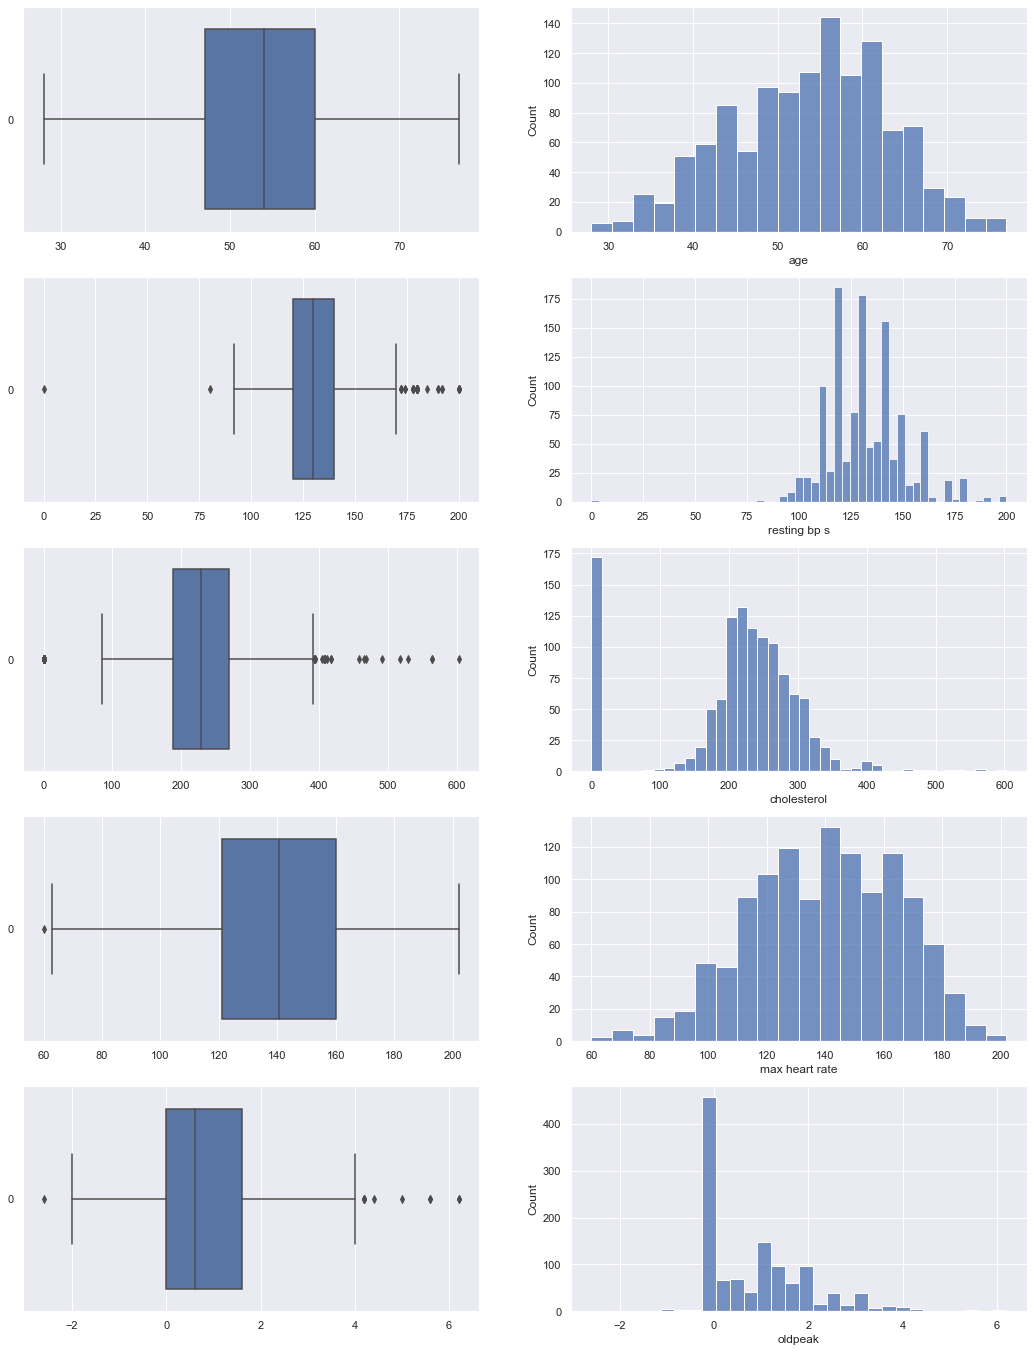

In [8]:
# Draw boxplot for numeric variables to identify anomalies that need to be cleaned
f,axes = plt.subplots(5,2, figsize = (18,24))

count = 0
for var in numeric_variables:
    sb.boxplot(data = numeric_variables[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numeric_variables[var], ax = axes[count,1])
    count +=1

### 1.3 Data Cleaning

In [9]:
#Remove anomalies for resting bp s
#Remove resting bp s = 0 and resting bp s > upper whisker
upper = (heartdata['resting bp s'].quantile(0.75)-heartdata['resting bp s'].quantile(0.25))*1.5+heartdata['resting bp s'].quantile(0.75)
cleandf = cleandf[~((cleandf['resting bp s']==0)|(cleandf['resting bp s']>upper))]

#Remove anomalies for max heart rate
#Remove max heart rate > (220-age)
cleandf = cleandf[~(cleandf['max heart rate']>(220-cleandf['age']))]

#Remove anomalies for cholesterol
#Remove cholesterol = 0
cleandf = cleandf[~(cleandf['cholesterol']==0)]

In [10]:
# Is cleaned dataset balanced?
count1, count0 = cleandf['target'].value_counts()
print("Ratio of classes is normal : heart disease = ", count0, ":", count1)

Ratio of classes is normal : heart disease =  419 : 437


-------------------------------------------------------------------------------------------------------------------------------

## 2. Exploratory Data Analysis (EDA)

### 2.1 Numeric Variables

In [11]:
clean_num = pd.DataFrame(cleandf[["age", "resting bp s", "cholesterol", "max heart rate", "oldpeak"]])
clean_num.describe().round(2)

,age,resting bp s,cholesterol,max heart rate,oldpeak
count,856.00,856.00,856.00,856.00,856.00
mean,53.10,130.99,243.72,137.97,0.99
std,9.47,15.67,56.13,22.40,1.09
min,28.00,92.00,85.00,69.00,-0.10
25%,46.00,120.00,208.00,122.00,0.00
50%,54.00,130.00,237.00,140.00,0.80
75%,60.00,140.00,274.00,155.00,1.70
max,77.00,170.00,603.00,185.00,6.20


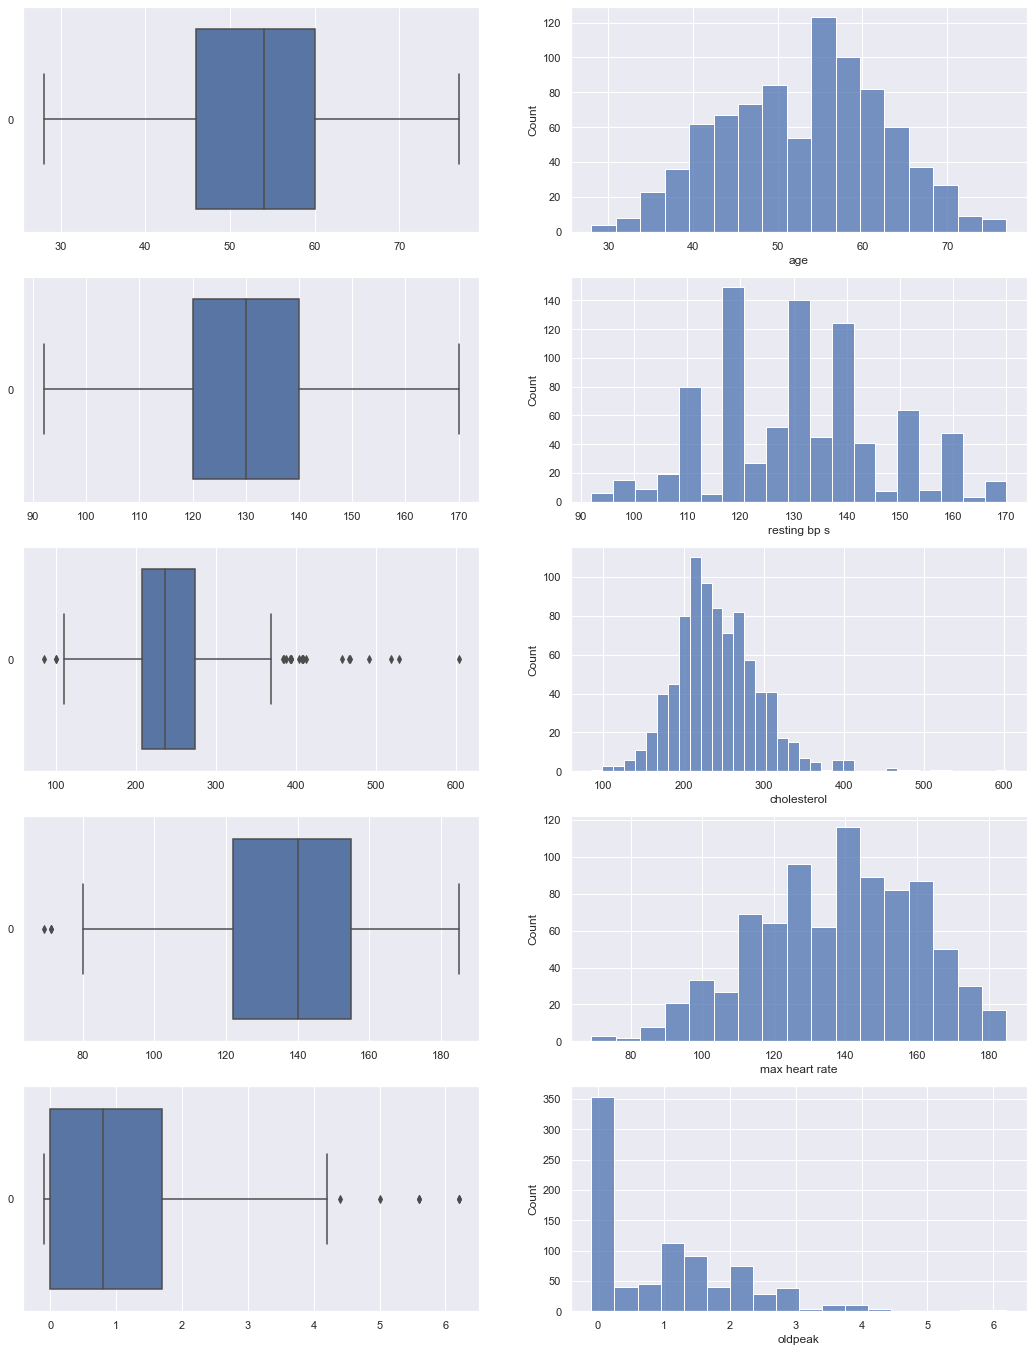

In [12]:
# Draw boxplot for clean numeric variables
f,axes = plt.subplots(5,2, figsize = (18,24))

count = 0
for var in clean_num:
    sb.boxplot(data = clean_num[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = clean_num[var], ax = axes[count,1])
    count +=1

                     age  resting bp s  cholesterol  max heart rate   oldpeak
age             1.000000      0.280102     0.047276       -0.443281  0.298883
resting bp s    0.280102      1.000000     0.099058       -0.155518  0.230970
cholesterol     0.047276      0.099058     1.000000       -0.020512  0.042241
max heart rate -0.443281     -0.155518    -0.020512        1.000000 -0.233011
oldpeak         0.298883      0.230970     0.042241       -0.233011  1.000000


<AxesSubplot:>

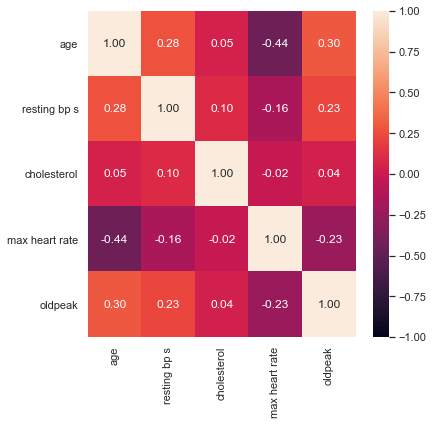

In [13]:
# Find correlation between numeric variables
print(clean_num.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(6, 6))
sb.heatmap(clean_num.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

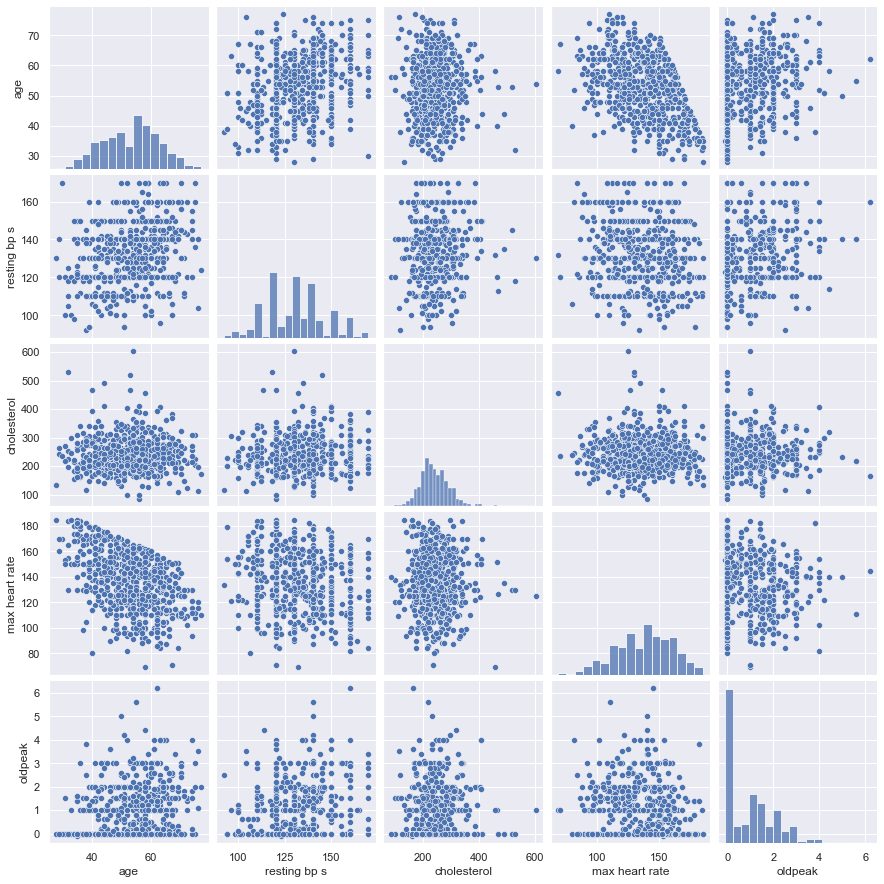

In [14]:
sb.pairplot(data = clean_num)

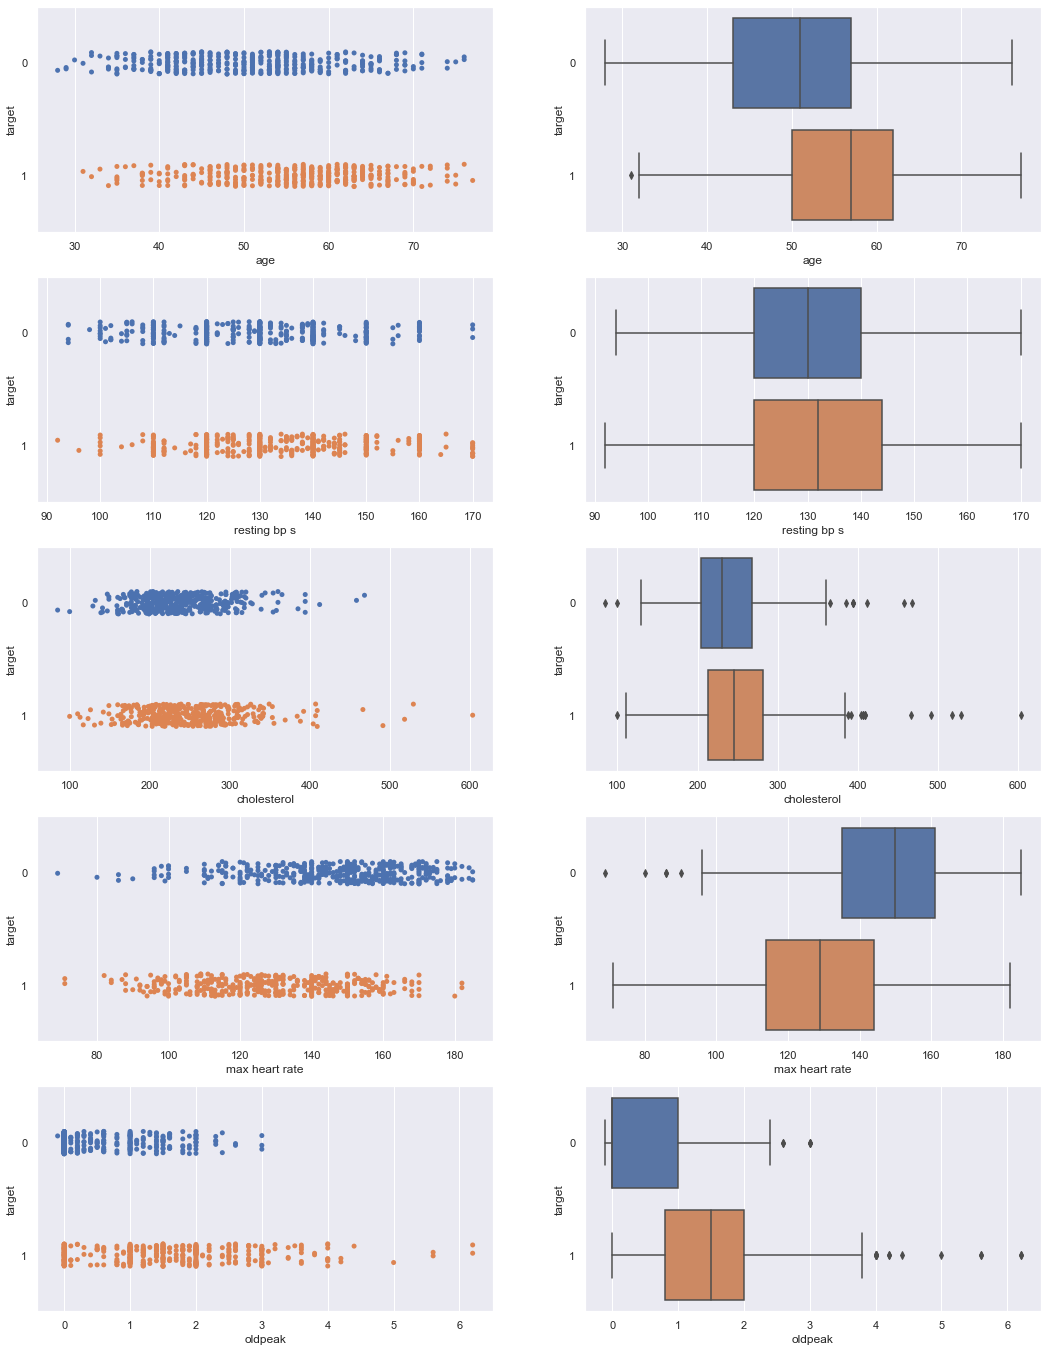

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

In [15]:
# Target vs the various numeric variables
f,axes = plt.subplots(5,2, figsize = (18,24))

count = 0 
for var in clean_num:
    f = plt.figure(figsize=(16, 8))
    sb.stripplot(x = clean_num[var], y = 'target', data = cleandf, ax = axes[count,0])
    sb.boxplot(x = clean_num[var], y = 'target', data = cleandf, ax = axes[count,1])
    count +=1

In [16]:
# Absolute Difference in medians within the numeric variables
for var in clean_num:
    t1 = cleandf[cleandf['target']==1][var].median()
    t0 = cleandf[cleandf['target']==0][var].median()
    d = abs((t0-t1)/(t1))*100
    print("Difference in medians", var, ":", d,"%")

Difference in medians age : 10.526315789473683 %
Difference in medians resting bp s : 1.5151515151515151 %
Difference in medians cholesterol : 6.097560975609756 %
Difference in medians max heart rate : 16.27906976744186 %
Difference in medians oldpeak : 100.0 %


Extracting significant numeric variables as predictors in machine learning models:

Consideration: Magnitude of difference in medians between those with and without heart disease within each variable > 10%

Numeric variables to be used: age, max heart rate and oldpeak

### 2.2 Categorical Variables

<AxesSubplot:xlabel='ST slope', ylabel='target'>

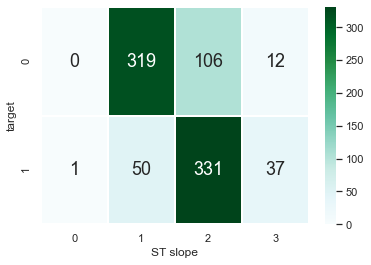

In [17]:
# Target vs Slope of the peak exercise ST segment
f = plt.figure(figsize=(6, 4))
sb.heatmap(cleandf.groupby(['target', 'ST slope']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

In [18]:
#Remove anomaly for ST Slope = 0 (no value 0 for ST Slope)
cleandf = cleandf[~(cleandf['ST slope']==0)]

cleandf.count()

age                    855
sex                    855
chest pain type        855
resting bp s           855
cholesterol            855
fasting blood sugar    855
resting ecg            855
max heart rate         855
exercise angina        855
oldpeak                855
ST slope               855
target                 855
dtype: int64

% of Heart Disease Patients with ST Slope Value 1: 5.85
% of Non-Heart Disease Patients with ST Slope Value 1: 37.31
% of Heart Disease Patients with ST Slope Value 2: 38.71
% of Non-Heart Disease Patients with ST Slope Value 2: 12.4
% of Heart Disease Patients with ST Slope Value 3: 4.33
% of Non-Heart Disease Patients with ST Slope Value 3: 1.4


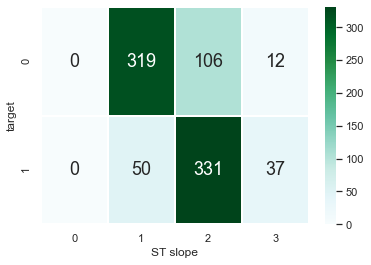

In [19]:
# Target vs revised Slope of the peak exercise ST segment
f = plt.figure(figsize=(6, 4))
sb.heatmap(cleandf.groupby(['target', 'ST slope']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

print("% of Heart Disease Patients with ST Slope Value 1:", round((50/(855)*100), 2))
print("% of Non-Heart Disease Patients with ST Slope Value 1:", round((319/(855)*100), 2))
print("% of Heart Disease Patients with ST Slope Value 2:", round((331/(855)*100), 2))
print("% of Non-Heart Disease Patients with ST Slope Value 2:", round((106/(855)*100), 2))
print("% of Heart Disease Patients with ST Slope Value 3:", round((37/(855)*100), 2))
print("% of Non-Heart Disease Patients with ST Slope Value 3:", round((12/(855)*100), 2))

% of Females with Heart Disease: 4.91
% of Females without Heart Disease: 20.35
% of Males with Heart Disease: 44.09
% of Males without Heart Disease: 30.76


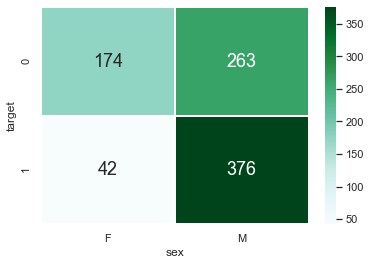

In [20]:
# Target vs Sex
f = plt.figure(figsize=(6, 4))
sb.heatmap(cleandf.groupby(['target', 'sex']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

print("% of Females with Heart Disease:", round((42/(855)*100), 2))
print("% of Females without Heart Disease:", round((174/(855)*100), 2))
print("% of Males with Heart Disease:", round((377/(855)*100), 2))
print("% of Males without Heart Disease:", round((263/(855)*100), 2))

% of Heart Disease Patients with Chest Pain Type 1: 1.87
% of Non-Heart Disease Patients with Chest Pain Type 1: 3.86
% of Heart Disease Patients with Chest Pain Type 2: 2.57
% of Non-Heart Disease Patients with Chest Pain Type 2: 17.43
% of Heart Disease Patients with Chest Pain Type 3: 6.43
% of Non-Heart Disease Patients with Chest Pain Type 3: 16.49
% of Heart Disease Patients with Chest Pain Type 4: 38.13
% of Non-Heart Disease Patients with Chest Pain Type 4: 13.33


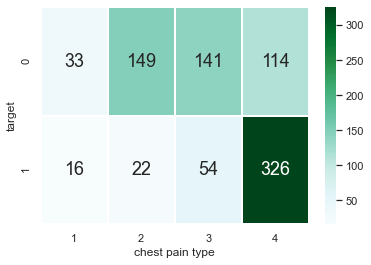

In [21]:
# Target vs Chest Pain Type
f = plt.figure(figsize=(6, 4))
sb.heatmap(cleandf.groupby(['target', 'chest pain type']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

print("% of Heart Disease Patients with Chest Pain Type 1:", round((16/(855)*100), 2))
print("% of Non-Heart Disease Patients with Chest Pain Type 1:", round((33/(855)*100), 2))
print("% of Heart Disease Patients with Chest Pain Type 2:", round((22/(855)*100), 2))
print("% of Non-Heart Disease Patients with Chest Pain Type 2:", round((149/(855)*100), 2))
print("% of Heart Disease Patients with Chest Pain Type 3:", round((55/(855)*100), 2))
print("% of Non-Heart Disease Patients with Chest Pain Type 3:", round((141/(855)*100), 2))
print("% of Heart Disease Patients with Chest Pain Type 4:", round((326/(855)*100), 2))
print("% of Non-Heart Disease Patients with Chest Pain Type 4:", round((114/(855)*100), 2))

% of Patients with fasting blood sugar > 120 mg/dl and with Heart Disease: 10.06
% of Patients with fasting blood sugar < 120 mg/dl and with Heart Disease: 38.95
% of Patients with fasting blood sugar > 120 mg/dl and without Heart Disease: 5.26
% of Patients with fasting blood sugar < 120 mg/dl and without Heart Disease: 45.85


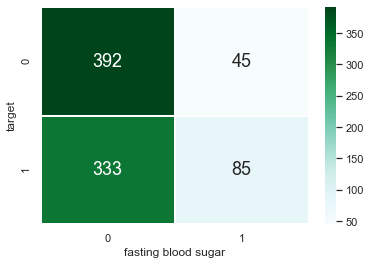

In [22]:
# Target vs Fasting Blood Sugar
f = plt.figure(figsize=(6, 4))
sb.heatmap(cleandf.groupby(['target', 'fasting blood sugar']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

print("% of Patients with fasting blood sugar > 120 mg/dl and with Heart Disease:", round((86/(855)*100), 2))
print("% of Patients with fasting blood sugar < 120 mg/dl and with Heart Disease:", round((333/(855)*100), 2))
print("% of Patients with fasting blood sugar > 120 mg/dl and without Heart Disease:", round((45/(855)*100), 2))
print("% of Patients with fasting blood sugar < 120 mg/dl and without Heart Disease:", round((392/(855)*100), 2))

% of Resting ECG Type 0 and with Heart Disease: 24.68
% of Resting ECG Type 0 and without Heart Disease: 32.75
% of Resting ECG Type 1 and with Heart Disease: 8.3
% of Resting ECG Type 1 and without Heart Disease: 5.61
% of Resting ECG Type 2 and with Heart Disease: 16.02
% of Resting ECG Type 2 and without Heart Disease: 12.75


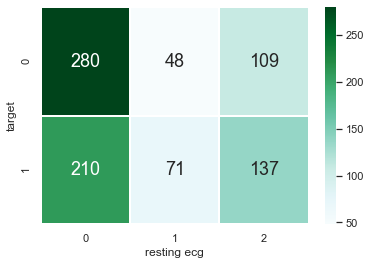

In [23]:
# Target vs Resting ECG
f = plt.figure(figsize=(6, 4))
sb.heatmap(cleandf.groupby(['target', 'resting ecg']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

print("% of Resting ECG Type 0 and with Heart Disease:", round((211/(855)*100), 2))
print("% of Resting ECG Type 0 and without Heart Disease:", round((280/(855)*100), 2))
print("% of Resting ECG Type 1 and with Heart Disease:", round((71/(855)*100), 2))
print("% of Resting ECG Type 1 and without Heart Disease:", round((48/(855)*100), 2))
print("% of Resting ECG Type 2 and with Heart Disease:", round((137/(855)*100), 2))
print("% of Resting ECG Type 2 and without Heart Disease:", round((109/(855)*100), 2))

% of Patients without Exercise Induced Angina and without Heart Disease: 43.86
% of Patients without Exercise Induced Angina and with Heart Disease: 16.02
% of Patients with Exercise Induced Angina and without Heart Disease: 7.25
% of Patients with Exercise Induced Angina and with Heart Disease: 32.98


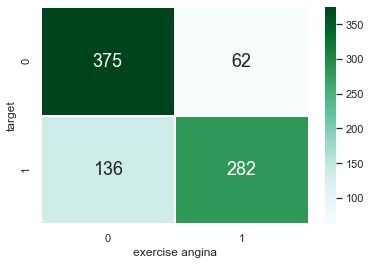

In [24]:
# Target vs Exercise Induced Angina
f = plt.figure(figsize=(6, 4))
sb.heatmap(cleandf.groupby(['target', 'exercise angina']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

print("% of Patients without Exercise Induced Angina and without Heart Disease:", round((375/(855)*100), 2))
print("% of Patients without Exercise Induced Angina and with Heart Disease:", round((137/(855)*100), 2))
print("% of Patients with Exercise Induced Angina and without Heart Disease:", round((62/(855)*100), 2))
print("% of Patients with Exercise Induced Angina and with Heart Disease:", round((282/(855)*100), 2))

Extracting significant categorical variables as predictors in machine learning models:

Consideration: Magnitude of % of difference between those with and without heart disease within each variable > 10%

Categorical variables to be used: ST slope, sex, chest pain type, exercise angina

In [25]:
# Extract clean numeric variables
clean_numeric_variables = pd.DataFrame(cleandf[["age", "max heart rate", "oldpeak"]])
clean_numeric_variables.describe().round(2)

,age,max heart rate,oldpeak
count,855.00,855.00,855.00
mean,53.08,137.98,0.99
std,9.46,22.41,1.09
min,28.00,69.00,-0.10
25%,46.00,122.00,0.00
50%,54.00,140.00,0.80
75%,60.00,155.00,1.70
max,77.00,185.00,6.20


In [26]:
# Extract clean categorical variables
clean_categorical = pd.DataFrame(cleandf[["sex", "chest pain type", "exercise angina",'ST slope']])
clean_categorical.describe()

,sex,chest pain type,exercise angina,ST slope
count,855,855,855,855
unique,2,4,2,3
top,M,4,0,2
freq,639,440,511,437


-------------------------------------------------------------------------------------------------------------------------------

## 3. Machine Learning Models

### 3.1 Decision Tree

In [27]:
clean_categorical['sex'] = cleandf['sex'].cat.rename_categories({'M': 1, 'F': 0})

In [28]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoding of categorical predictors (not the response)
OHE = []

for var in clean_categorical:
    if (clean_categorical[var].nunique()>2):
        OHE.append(var)
heartdata_cat_ohe = pd.get_dummies(clean_categorical, columns=OHE, drop_first=True)

# Check the encoded variables
heartdata_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855 entries, 0 to 1189
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sex                855 non-null    category
 1   exercise angina    855 non-null    category
 2   chest pain type_2  855 non-null    uint8   
 3   chest pain type_3  855 non-null    uint8   
 4   chest pain type_4  855 non-null    uint8   
 5   ST slope_1         855 non-null    uint8   
 6   ST slope_2         855 non-null    uint8   
 7   ST slope_3         855 non-null    uint8   
dtypes: category(2), uint8(6)
memory usage: 13.6 KB


In [29]:
# Combining Numeric features with the OHE Categorical features
heartdata_res = cleandf['target']
heartdata_ohe = pd.concat([clean_numeric_variables, heartdata_cat_ohe, heartdata_res], 
                           sort = False, axis = 1).reindex(index=clean_numeric_variables.index)

# Check the final dataframe
heartdata_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                855 non-null    int64   
 1   max heart rate     855 non-null    int64   
 2   oldpeak            855 non-null    float64 
 3   sex                855 non-null    category
 4   exercise angina    855 non-null    category
 5   chest pain type_2  855 non-null    uint8   
 6   chest pain type_3  855 non-null    uint8   
 7   chest pain type_4  855 non-null    uint8   
 8   ST slope_1         855 non-null    uint8   
 9   ST slope_2         855 non-null    uint8   
 10  ST slope_3         855 non-null    uint8   
 11  target             855 non-null    category
dtypes: category(3), float64(1), int64(2), uint8(6)
memory usage: 34.6 KB


[Text(911.7321428571429, 1467.72, 'ST slope_1 <= 0.5\ngini = 0.499\nsamples = 598\nvalue = [313, 285]\nclass = 1'),
 Text(478.2857142857143, 1141.56, 'sex <= 0.5\ngini = 0.386\nsamples = 340\nvalue = [89, 251]\nclass = 0'),
 Text(239.14285714285714, 815.4000000000001, 'chest pain type_4 <= 0.5\ngini = 0.46\nsamples = 67\nvalue = [43, 24]\nclass = 1'),
 Text(119.57142857142857, 489.24, 'max heart rate <= 97.5\ngini = 0.225\nsamples = 31\nvalue = [27, 4]\nclass = 1'),
 Text(59.785714285714285, 163.08000000000015, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 0'),
 Text(179.35714285714286, 163.08000000000015, 'gini = 0.128\nsamples = 29\nvalue = [27, 2]\nclass = 1'),
 Text(358.7142857142857, 489.24, 'oldpeak <= 1.3\ngini = 0.494\nsamples = 36\nvalue = [16, 20]\nclass = 0'),
 Text(298.92857142857144, 163.08000000000015, 'gini = 0.432\nsamples = 19\nvalue = [13, 6]\nclass = 1'),
 Text(418.5, 163.08000000000015, 'gini = 0.291\nsamples = 17\nvalue = [3, 14]\nclass = 0'),
 Text(717.4285714

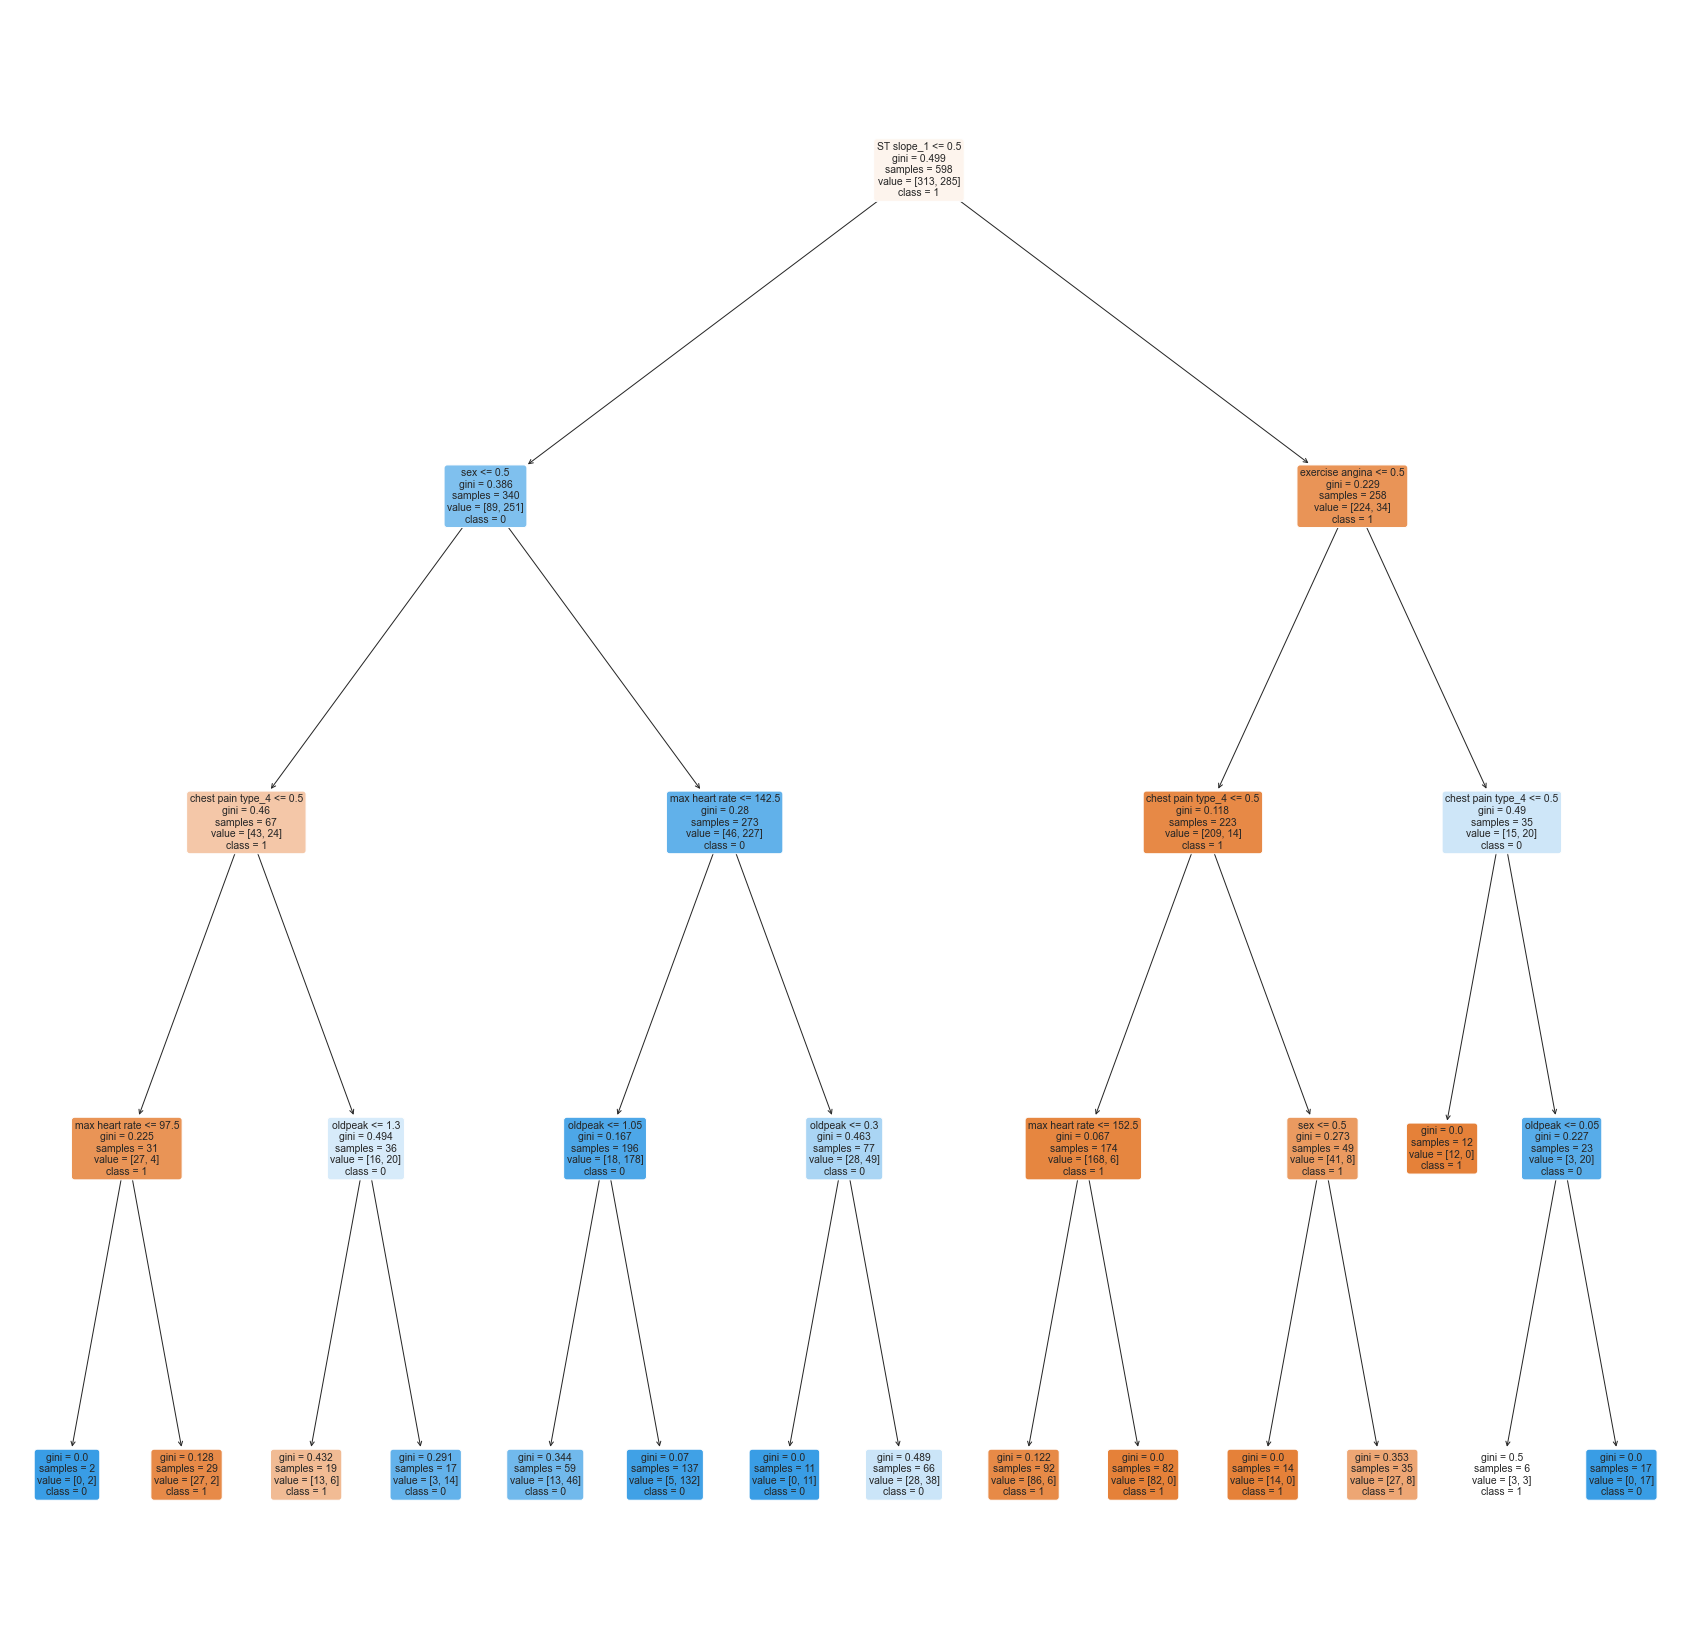

In [30]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Extract Response and Predictors
y = pd.DataFrame(heartdata_ohe['target'])
X = pd.DataFrame(heartdata_ohe.drop('target', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(30,30))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["1","0"])

Train Data
Accuracy  :	 0.8762541806020067

TPR Train :	 0.9122807017543859
TNR Train :	 0.8434504792332268

FPR Train :	 0.15654952076677317
FNR Train :	 0.08771929824561403


<AxesSubplot:>

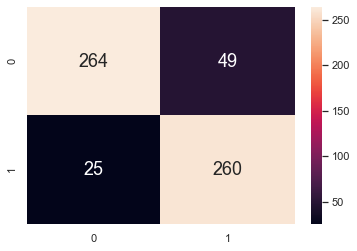

In [31]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8443579766536965

TPR Test :	 0.8345864661654135
TNR Test :	 0.8548387096774194

FPR Test :	 0.14516129032258066
FNR Test :	 0.16541353383458646


<AxesSubplot:>

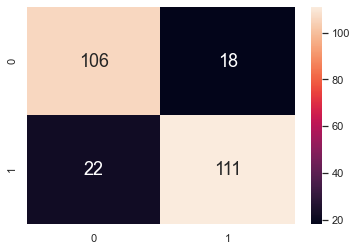

In [32]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### 3.2 Random Forest

In [33]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 4)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.target.ravel())

RandomForestClassifier(max_depth=4)

Train Data
Accuracy  :	 0.8963210702341137

TPR Train :	 0.9228070175438596
TNR Train :	 0.8722044728434505

FPR Train :	 0.12779552715654952
FNR Train :	 0.07719298245614035


<AxesSubplot:>

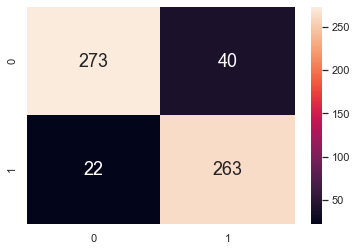

In [34]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.867704280155642

TPR Test :	 0.8571428571428571
TNR Test :	 0.8790322580645161

FPR Test :	 0.12096774193548387
FNR Test :	 0.14285714285714285


<AxesSubplot:>

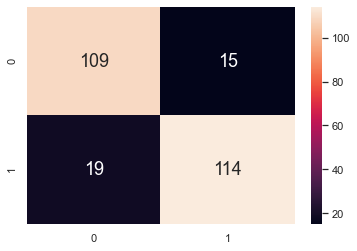

In [35]:
# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### 3.3 Random Forest (With increased Estimators and Depth)

In [36]:
# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 1000,  # n_estimators denote number of trees
                                 max_depth = 10)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.target.ravel())

RandomForestClassifier(max_depth=10, n_estimators=1000)

Train Data
Accuracy  :	 0.9899665551839465

TPR Train :	 1.0
TNR Train :	 0.9808306709265175

FPR Train :	 0.019169329073482427
FNR Train :	 0.0


<AxesSubplot:>

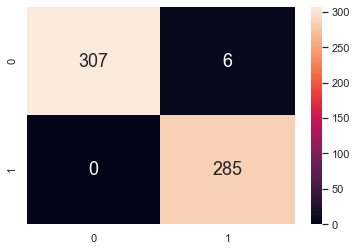

In [37]:
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.9299610894941635

TPR Test :	 0.9323308270676691
TNR Test :	 0.9274193548387096

FPR Test :	 0.07258064516129033
FNR Test :	 0.06766917293233082


<AxesSubplot:>

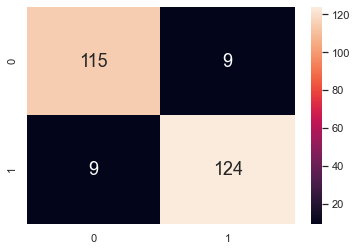

In [38]:
# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### 3.4 Logistic Regression with Back Elimination

In [39]:
cleandf['sex'] = cleandf['sex'].cat.rename_categories({'M': 1, 'F': 0})
cat = cleandf.select_dtypes(['category']).columns
cleandf[cat] = cleandf[cat].astype('int')
cleandf.dtypes

age                      int64
sex                      int32
chest pain type          int32
resting bp s             int64
cholesterol              int64
fasting blood sugar      int32
resting ecg              int32
max heart rate           int64
exercise angina          int32
oldpeak                float64
ST slope                 int32
target                   int32
dtype: object

In [40]:
# Import statsmodels for logit
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print("Table 1:")
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.334024
         Iterations 7
Table 1:
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.517     
Dependent Variable: target           AIC:              421.4930  
Date:               2022-04-24 23:45 BIC:              469.8225  
No. Observations:   598              Log-Likelihood:   -199.75   
Df Model:           10               LL-Null:          -413.85   
Df Residuals:       587              LLR p-value:      9.2910e-86
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
age                0.0248   0.0162  1.5324 0.1254 -0.0069  0.0565
max heart rate    -0.0086   0.0071 -1.2103 0.2262 -0.0225

In [41]:
X1 = cleandf.loc[:, cleandf.columns != 'target'] #predictors
y1 = cleandf.loc[:, cleandf.columns == 'target'] #response variable
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state = 100)

import statsmodels.api as sm
logit_model=sm.Logit(y_train1,X_train1)
result=logit_model.fit()
print("Table 2:")
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.366927
         Iterations 7
Table 2:
                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.470     
Dependent Variable:   target           AIC:              460.8447  
Date:                 2022-04-24 23:45 BIC:              509.1742  
No. Observations:     598              Log-Likelihood:   -219.42   
Df Model:             10               LL-Null:          -413.85   
Df Residuals:         587              LLR p-value:      2.2210e-77
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       7.0000                                       
-------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------
age                 -0.0218   0.0137 -1.5942 0.1109 -0.0486  0.0050
sex                  1.6003   0.

Using a significance level of 5%, variables with p-values less than 0.05 are considered statistically significant. 
Hence, from the logistic regression model with all factors present, the less significant factors will be: age, resting bp s, cholesterol, fasting blood sugar and resting ecg.

Therefore, it implies that the data-driven elimination done manually in EDA was largely accurate, with age being the only exception.

Additionally, the higher R-squared in Table 1 as compared to Table 2 shows that our elimination resulted in a model of better fit. Hence, in our following analysis, we will be using the **model in Table 1**.

In [42]:
# Import LogisticRegression and metrics from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(max_iter=1500)
logreg.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=1500)

In [43]:
y_pred = logreg.predict(X_train)

Classification Accuracy: 0.8662207357859532

TPR Train :	 0.8842105263157894
TNR Train :	 0.8498402555910544

FPR Train :	 0.1501597444089457
FNR Train :	 0.11578947368421053


<AxesSubplot:>

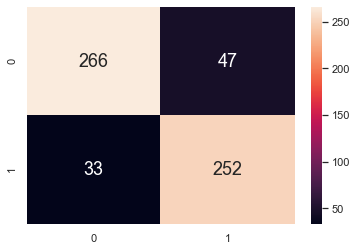

In [44]:
# Print the Classification Accuracy
print("Classification Accuracy:", logreg.score(X_train, y_train))
print()

#Print TP, FN, FP, TN rates
cm = confusion_matrix(y_train, y_pred)
print("TPR Train :\t", cm[1][1]/(cm[1][1]+cm[1][0])) #tpr = true positive / total positives
print("TNR Train :\t", cm[0][0]/(cm[0][0]+cm[0][1])) #tnr = true negatives / total negatives
print()

print("FPR Train :\t", cm[0][1]/(cm[0][1]+cm[0][0])) #fpr = false positive / total negatives
print("FNR Train :\t", cm[1][0]/(cm[1][0]+cm[1][1])) #fnr = false negative / total positives

# Plot the two-way Confusion Matrix as a heatmap
sb.heatmap(confusion_matrix(y_train, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [45]:
y_pred = logreg.predict(X_test)

Classification Accuracy: 0.8560311284046692

TPR Test :	 0.8270676691729323
TNR Test :	 0.8870967741935484

FPR Test :	 0.11290322580645161
FNR Test :	 0.17293233082706766


<AxesSubplot:>

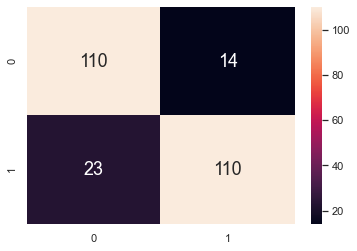

In [46]:
# Print the Classification Accuracy
print("Classification Accuracy:", logreg.score(X_test, y_test))
print()

#Print TP, FN, FP, TN rates
cm = confusion_matrix(y_test, y_pred)
print("TPR Test :\t", cm[1][1]/(cm[1][1]+cm[1][0])) #tpr = true positive / total positives
print("TNR Test :\t", cm[0][0]/(cm[0][0]+cm[0][1])) #tnr = true negatives / total negatives
print()

print("FPR Test :\t", cm[0][1]/(cm[0][1]+cm[0][0])) #fpr = false positive / total negatives
print("FNR Test :\t", cm[1][0]/(cm[1][0]+cm[1][1])) #fnr = false negative / total positives

# Plot the two-way Confusion Matrix as a heatmap
sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

-------------------------------------------------------------------------------------------------------------------------------

## 4. Proposed Solution

Target user of our model: hospitals/doctors

Aim: Lighten the workload of doctors by providing a 'robo-medivisor' through a machine learning algorithm that analyses the risk of heart disease from the patient's simple health check-up results and increase doctors' efficiency in detecting potential heart disease patients early

Functions of the 'robo-medivisor' after analysis of check-up results: 
- Recommend a more comprehensive check-up for people of higher risk
- Sent identities and reports of potential heart disease patients to doctors for follow-up
- Highlight areas of concern analysed from the algorithm to the doctors e.g. exercise angina 